In [3]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from skimage import io, util
from scipy.signal import convolve2d
from scipy.signal import wiener

In [4]:
img = io.imread('trui.png')  

In [5]:
def LSI(image, kernel, noise_image):

    # convolution
    degraded = convolve2d(image, kernel, mode='same', boundary='symm')
    
    # Adding noise
    degraded += noise_image

    return degraded
    
# Gaussian kernel generating function
def gaussian_kernel(kernel_size=5, sigma=1.0):
    ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    return kernel

# Mean kernel generating function
def mean_kernel(size=3):
    return np.ones((size, size)) / (size * size)

# 5*5 Gaussian kernel
g_kernel = gaussian_kernel(kernel_size=5, sigma=1.0)
# 5*5 mean kernel
m_kernel = mean_kernel(size = 5)

# Generate noisy images
noise_image = np.random.normal(0, 2.5, img.shape)
# Applying the LSI model
gaussian_degraded_image = LSI(img, g_kernel, noise_image)
mean_degraded_image = LSI(img, m_kernel, noise_image)

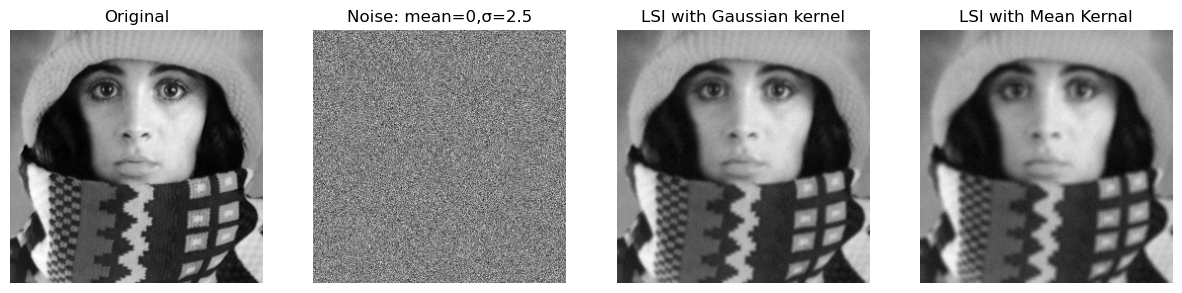

In [37]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(noise_image, cmap='gray')
axes[1].set_title("Noise: mean=0,σ=2.5")
axes[1].axis('off')

axes[2].imshow(gaussian_degraded_image, cmap='gray')
axes[2].set_title("LSI with Gaussian kernel")
axes[2].axis('off')

axes[3].imshow(mean_degraded_image, cmap='gray')
axes[3].set_title("LSI with Mean Kernal")
axes[3].axis('off')
plt.savefig('2.1_1.png')
plt.show()

In [39]:
# 5*5 Gaussian kernel
g_kernel2 = gaussian_kernel(kernel_size=5, sigma=1.0)
# 5*5 mean kernel
m_kernel2 = mean_kernel(size = 5)

# Generate noisy images
noise_image2 = np.random.normal(0, 50, img.shape)
# Applying the LSI model
gaussian_degraded_image2 = LSI(img, g_kernel2, noise_image2)
mean_degraded_image2 = LSI(img, m_kernel2, noise_image2)

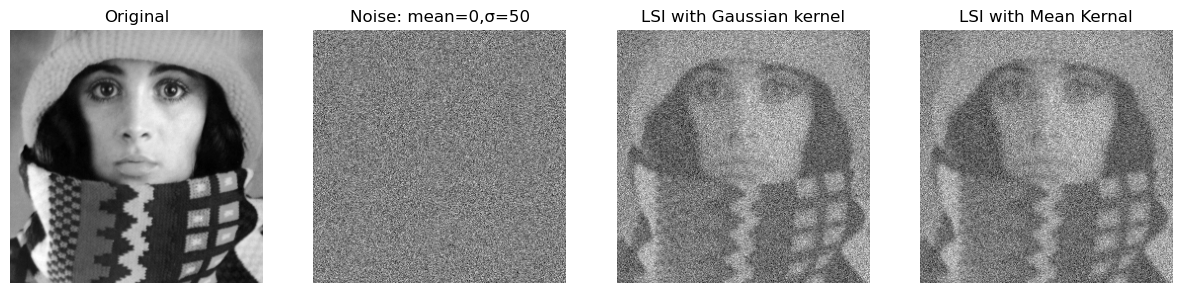

In [41]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(noise_image2, cmap='gray')
axes[1].set_title("Noise: mean=0,σ=50")
axes[1].axis('off')

axes[2].imshow(gaussian_degraded_image2, cmap='gray')
axes[2].set_title("LSI with Gaussian kernel")
axes[2].axis('off')

axes[3].imshow(mean_degraded_image2, cmap='gray')
axes[3].set_title("LSI with Mean Kernal")
axes[3].axis('off')
plt.savefig('2.1_2.png')
plt.show()

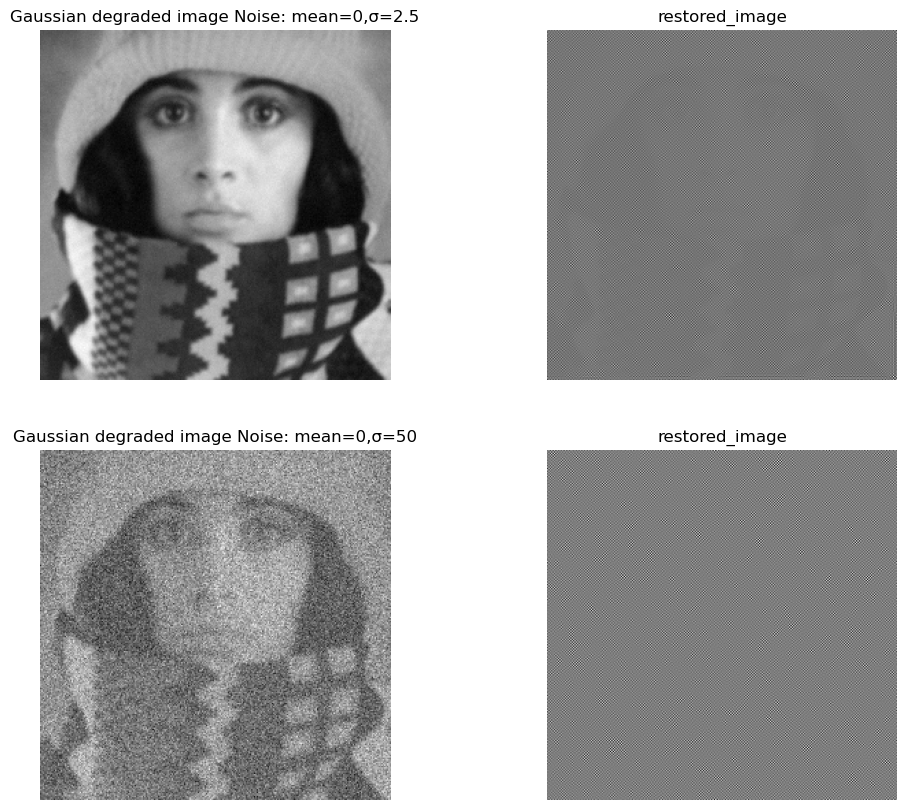

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.fft import fft2, ifft2

def inverse_filtering(degraded_image, psf):

    # Fourier transform
    G = fft2(degraded_image)
    H = fft2(psf, s=degraded_image.shape)

    # F(u,v) = G(u,v)/H(u,v)
    F = G / H

    # Fourier inverse transformation.
    restored_image = np.real(ifft2(F))

    return restored_image  

restored_image1 = inverse_filtering(gaussian_degraded_image,g_kernel)
restored_image2 = inverse_filtering(gaussian_degraded_image2,g_kernel2)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0,0].imshow(gaussian_degraded_image, cmap='gray')
axes[0,0].set_title("Gaussian degraded image Noise: mean=0,σ=2.5")
axes[0,0].axis('off')

axes[0,1].imshow(restored_image1, cmap='gray')
axes[0,1].set_title("restored_image")
axes[0,1].axis('off')

axes[1,0].imshow(gaussian_degraded_image2, cmap='gray')
axes[1,0].set_title("Gaussian degraded image Noise: mean=0,σ=50")
axes[1,0].axis('off')

axes[1,1].imshow(restored_image2, cmap='gray')
axes[1,1].set_title("restored_image")
axes[1,1].axis('off')
plt.savefig('2.2.png')
plt.show()

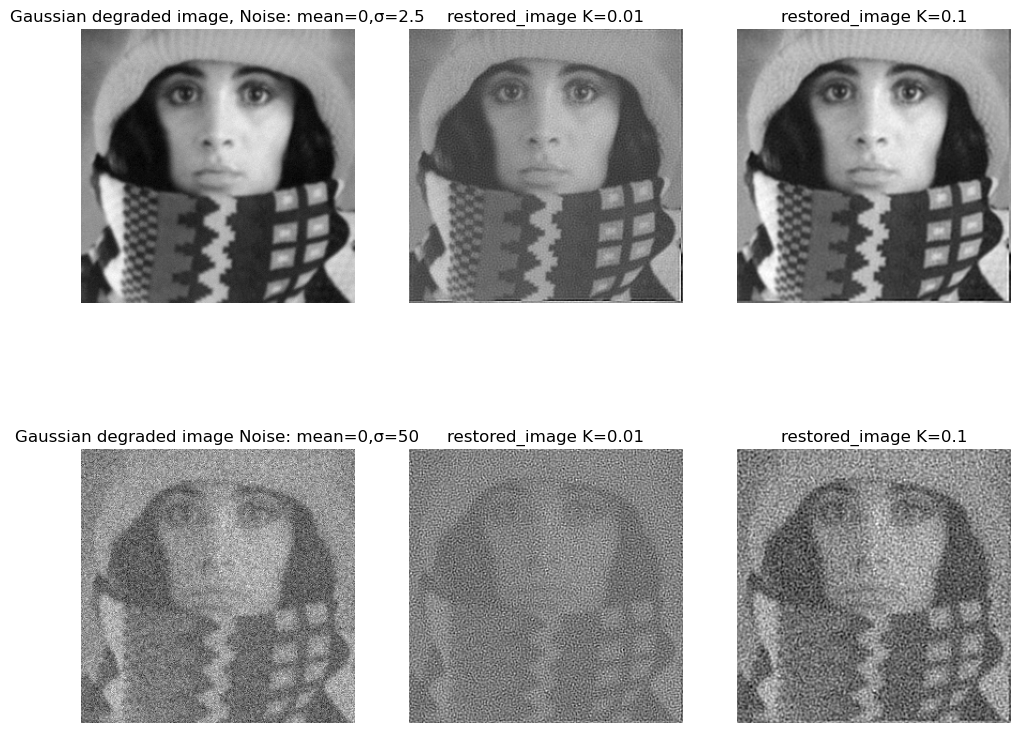

In [45]:
# 2-3
def wiener_filter(degraded_image, psf, K):

    # Fourier transform
    G = fft2(degraded_image)
    H = fft2(psf, s=degraded_image.shape)

    F_hat = (np.abs(H)**2 / (np.abs(H)**2 + K)) * (1/H) * G
   

    # Fourier inverse transformation.
    restored_image = np.real(ifft2(F_hat))

    return restored_image  
    
restored_image1 = wiener_filter(gaussian_degraded_image, g_kernel, 0.01)
restored_image2 = wiener_filter(gaussian_degraded_image, g_kernel,  0.1)
restored_image3 = wiener_filter(gaussian_degraded_image2,g_kernel2 ,  0.01)
restored_image4 = wiener_filter(gaussian_degraded_image2,g_kernel2 ,  0.1)

fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes[0,0].imshow(gaussian_degraded_image, cmap='gray')
axes[0,0].set_title("Gaussian degraded image, Noise: mean=0,σ=2.5")
axes[0,0].axis('off')

axes[0,1].imshow(restored_image1, cmap='gray')
axes[0,1].set_title("restored_image K=0.01")
axes[0,1].axis('off')

axes[0,2].imshow(restored_image2, cmap='gray')
axes[0,2].set_title("restored_image K=0.1")
axes[0,2].axis('off')

axes[1,0].imshow(gaussian_degraded_image2, cmap='gray')
axes[1,0].set_title("Gaussian degraded image Noise: mean=0,σ=50")
axes[1,0].axis('off')

axes[1,1].imshow(restored_image3, cmap='gray')
axes[1,1].set_title("restored_image K=0.01")
axes[1,1].axis('off')

axes[1,2].imshow(restored_image4, cmap='gray')
axes[1,2].set_title("restored_image K=0.1")
axes[1,2].axis('off')
plt.savefig('2.3.png')
plt.show()